In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers

In [3]:
#for preprocessing: To load data, need to add path  
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [4]:
#set images size
img_width = 180
img_height = 180

In [5]:
#bring dataset into form of arrays
#training part
data_train = tf.keras.utils.image_dataset_from_directory( #leads data from disk into form of array
    data_train_path, #argument pass
    shuffle=True, #shuffle dataset
    image_size=(img_width, img_height),
    batch_size=32, #process er jonno group hoye load hobe (32 images at a time)
    validation_split=False) #for only one dataset, it will split it two parts (training & validation)

#in result it will show: we have 36 types of vegetables in the folder

Found 3115 files belonging to 36 classes.


In [6]:
data_train.class_names #our dataset fruits and veg types

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_cat = data_train.class_names #loading to data_category

In [8]:
#validation part
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,  #process er jonno group hoye load hobe (32 images at a time)
    shuffle=False, #tensorflow randomly test img shuffle korbe na
    validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
#testing part
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,  #process er jonno group hoye load hobe (32 images at a time)
    validation_split=False
)

Found 359 files belonging to 36 classes.


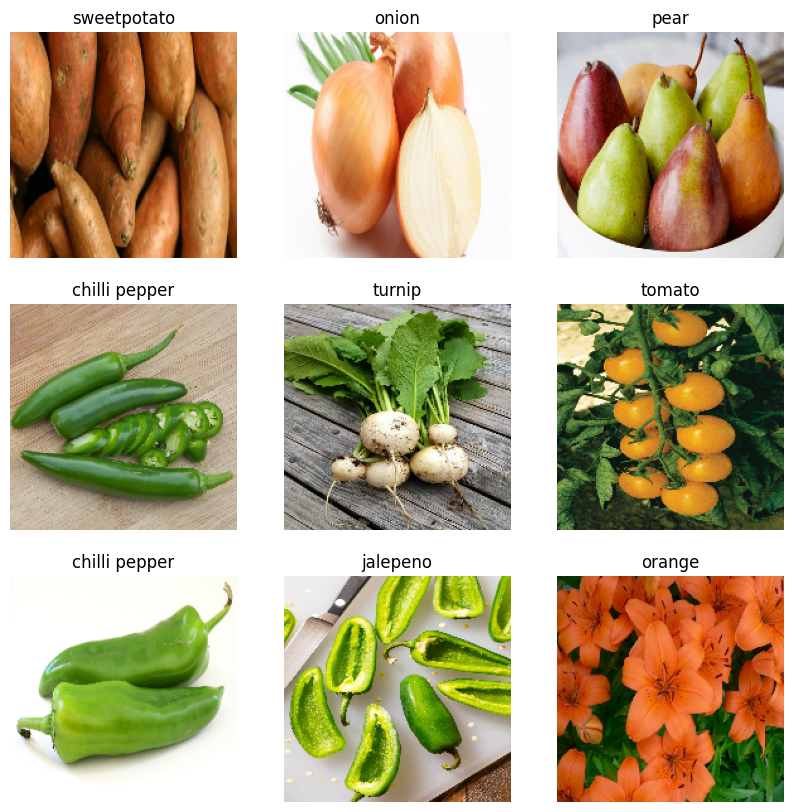

In [10]:
#print some images from training dataset

plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):  #Take one batch from the training dataset
    for i in range(9): #print 9 images
        plt.subplot(3,3,i+1) #3x3 grid image print hobe (3 rows x 3 columns)
        plt.imshow(image[i].numpy().astype('uint8')) #i'th image tensor convert hobe Numpy array te 
                                                     #'uint8 is unsigned 8-bit integer format (for display)
        plt.title(data_cat[labels[i]]) #label[i]=class index of the i-th image in the batch.
                                        #data_cat[labels[i] = gets the actual category name
        plt.axis('off') #extra lekha remove hobe, for clean photo
#now we have the dataset is ready

In [11]:
#created a sequential model
from tensorflow.keras.models import Sequential 

In [12]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
#Model Creation
#images will be stored in the form of RGB
#Purpose: Learn spatial features like edges, textures from the image.

model = Sequential([        
    layers.Rescaling(1./255),    #rescaling every color to get within 0 and 1 colors. For smaller input
    layers.Conv2D(16, 3, padding='same', activation='relu'), #16 filters,3x3 kernel size 
                                            #'same' padding: keeps output size same as input size
    layers.MaxPooling2D(),                  #Takes the max value in each 2x2 
    
    layers.Conv2D(32,3, padding='same', activation='relu'),      #More filters = learn more complex patterns
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), 
    layers.Flatten(),                  #Converts the 2D feature maps into a 1D vector.
    layers.Dropout(0.2),               #Randomly sets 20% of inputs to 0 during training.Why?Helps prevent overfitting 
    layers.Dense(128),                 #A fully connected layer with 128 neurons.
    layers.Dense(len(data_cat))        #passing the len of 36 category
])

In [14]:
#using the optimzer adam. and loss function

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])  


#"from_logits=True" means: output layer a softmax nai
#"metrics=['accuracy']" means: Tells Keras to track accuracy during training and evaluation.

In [15]:
#accuracy check
epochs_size = 25           #one complete pass through the entier dataset
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 33s 315ms/step - loss: 3.2685 - accuracy: 0.1066 - val_loss: 2.3314 - val_accuracy: 0.3447
Epoch 2/25
98/98 [==============================] - 36s 346ms/step - loss: 2.4075 - accuracy: 0.3075 - val_loss: 1.6017 - val_accuracy: 0.5698
Epoch 3/25
98/98 [==============================] - 35s 338ms/step - loss: 1.8875 - accuracy: 0.4639 - val_loss: 0.9490 - val_accuracy: 0.7692
Epoch 4/25
98/98 [==============================] - 33s 323ms/step - loss: 1.2828 - accuracy: 0.6247 - val_loss: 0.6208 - val_accuracy: 0.8775
Epoch 5/25
98/98 [==============================] - 34s 328ms/step - loss: 0.7008 - accuracy: 0.8000 - val_loss: 0.5235 - val_accuracy: 0.9031
Epoch 6/25
98/98 [==============================] - 35s 339ms/step - loss: 0.3857 - accuracy: 0.8950 - val_loss: 0.3608 - val_accuracy: 0.9430
Epoch 7/25
98/98 [==============================] - 36s 346ms/step - loss: 0.2713 - accuracy: 0.9390 - val_loss: 0.3760 - val_accuracy: 0.9430

Text(0.5, 1.0, 'loss')

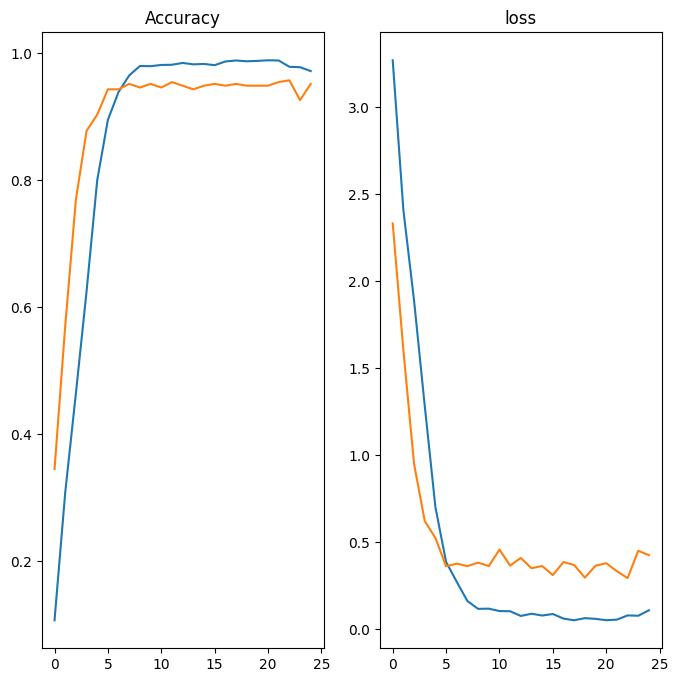

In [16]:
#training accuracy vs validation accuracy graph

epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('loss')

In [17]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, axis=0)


In [18]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 74ms/step


In [19]:
score = tf.nn.softmax(predict)

In [20]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 91.59


In [21]:
model.save('image_classifications.keras')